# library install

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import periodogram

# data install

In [52]:
# データのロード
flights = sns.load_dataset('flights')


In [53]:
print(flights.head())
print(flights.shape)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
(144, 3)


In [54]:
# 月名を数値（月番号）に変換
flights['month'] = pd.to_datetime(flights['month'], format='%b').dt.month

# 年月をインデックスにして時系列データを作成
flights['date'] = pd.to_datetime(flights[['year', 'month']].assign(day=1))
flights.set_index('date', inplace=True)

# passengers 列を時系列データとして使用
flights_series = flights['passengers']

# 確認
print(flights_series.head())

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64


# plot raw data

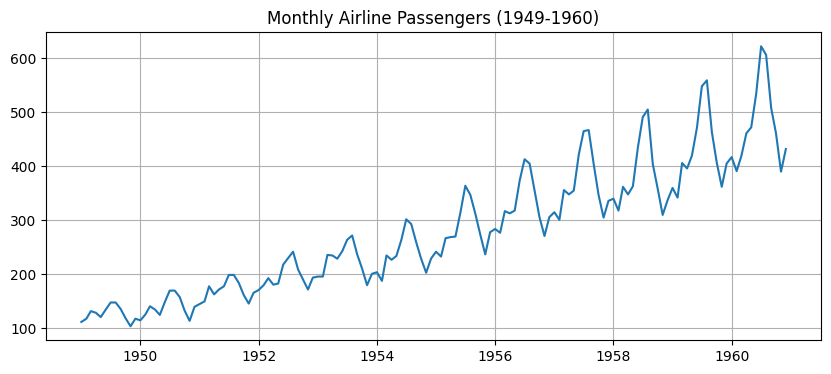

In [55]:
# 時系列データのプロット
plt.figure(figsize=(10, 4))
plt.plot(flights_series)
plt.title('Monthly Airline Passengers (1949-1960)')
plt.grid(True)
plt.show()

# 自己相関、偏自己相関、スペクトル密度関数

In [56]:
# コレログラム(自己相関関数)をプロットする関数
def plot_acf(series, lags, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=ax)
    plt.title(title)
    plt.show()

# 偏自己相関関数をプロットする関数
def plot_pacf(series, lags, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=ax)
    plt.title(title)
    plt.show()

# スペクトル密度関数をプロットする関数
def plot_spectrum(series, title):
    f, Pxx = periodogram(series)
    plt.figure(figsize=(8, 4))
    plt.semilogy(f, Pxx)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()

# それぞれのモデルの残差をプロット
def plot_residuals(resid, title):
    plt.figure(figsize=(10, 4))
    plt.plot(resid)
    plt.title(title)
    plt.grid(True)
    plt.show()


# fitting

In [57]:
# 頻度を明示的に設定
flights_series.index = pd.date_range(start=flights_series.index[0], end=flights_series.index[-1], freq='MS')

# AR(1) モデルのフィッティング
ar1_model = ARIMA(flights_series, order=(1, 0, 0)).fit() # p=1, 残差=0, q=0
ar1_resid = ar1_model.resid

# MA(1) モデルのフィッティング (初期パラメータなし)
ma1_model = ARIMA(flights_series, order=(0, 0, 1)).fit() # p=0, 残差=0, q=1
ma1_resid = ma1_model.resid

# ARMA(1,1) モデルのフィッティング (初期パラメータなし)
arma11_model = ARIMA(flights_series, order=(1, 0, 1)).fit() # p=1, 残差=0, q=1
arma11_resid = arma11_model.resid

c:\Users\mkwkz\python_env\statistic_certificate\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [58]:
# 残差を確認
print(f"AR(1) model residuals:\n{ar1_resid[:5]}")
print(f"MA(1) model residuals:\n{ma1_resid[:5]}")
print(f"ARMA(1,1) model residuals:\n{arma11_resid[:5]}")

AR(1) model residuals:
1949-01-01   -168.294340
1949-02-01      0.033720
1949-03-01      8.246429
1949-04-01     -8.257251
1949-05-01    -13.363605
Freq: MS, dtype: float64
MA(1) model residuals:
1949-01-01   -168.650190
1949-02-01    -78.381048
1949-03-01    -96.453912
1949-04-01    -79.421609
1949-05-01    -96.239096
Freq: MS, dtype: float64
ARMA(1,1) model residuals:
1949-01-01   -168.300947
1949-02-01     -0.147755
1949-03-01      3.885658
1949-04-01    -13.904955
1949-05-01    -11.578269
Freq: MS, dtype: float64


# プロット4種をまとめて可視化する関数

In [59]:
# 残差の自己相関関数、偏自己相関関数、スペクトル密度をプロット
def analyze_residuals(resid, model_name):
    plot_residuals(resid, f'{model_name} Residuals')
    plot_acf(resid, lags=30, title=f'{model_name} Residuals ACF')
    plot_pacf(resid, lags=30, title=f'{model_name} Residuals PACF')
    plot_spectrum(resid, title=f'{model_name} Residuals Power Spectrum')

# 可視化
* ACF: 自己相関関数
* PACF: 偏自己相関

## AR

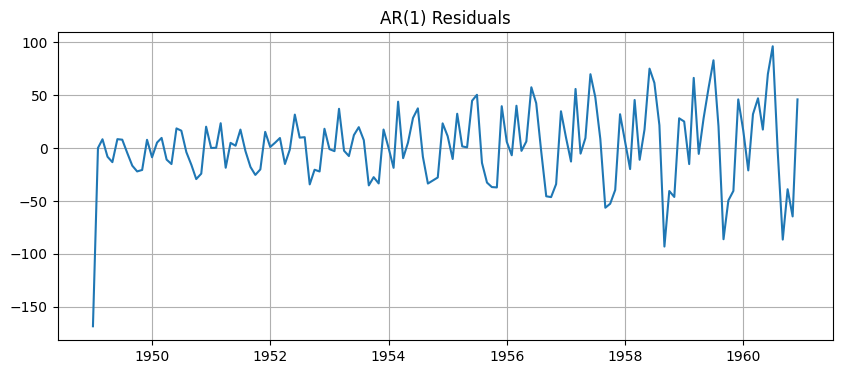

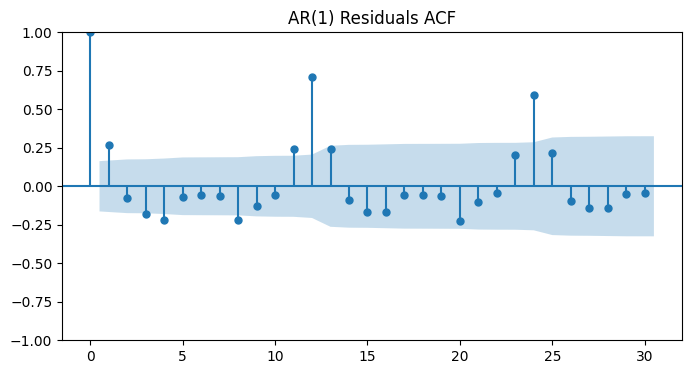

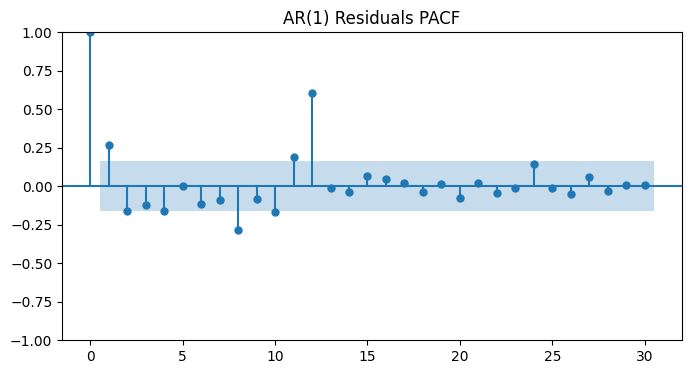

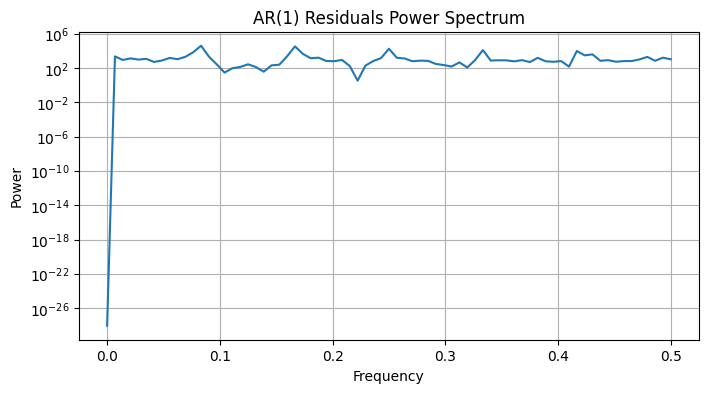

In [60]:
# AR(1) モデルの解析
analyze_residuals(ar1_resid, 'AR(1)')

## MA

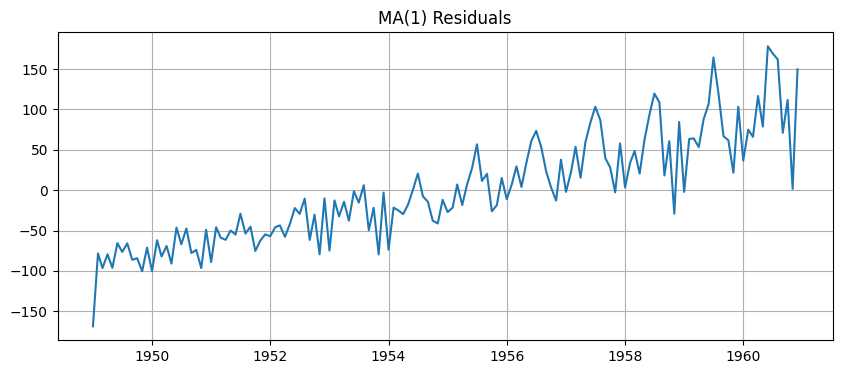

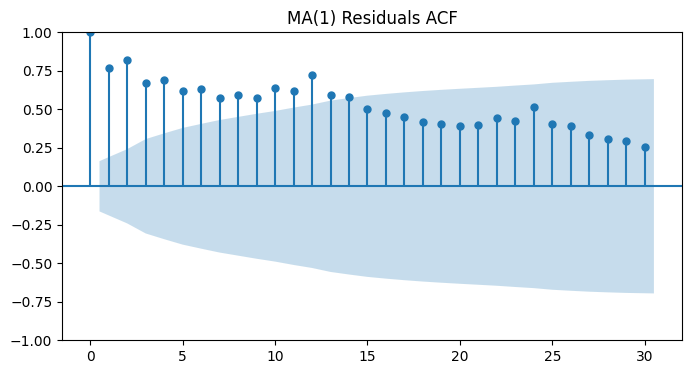

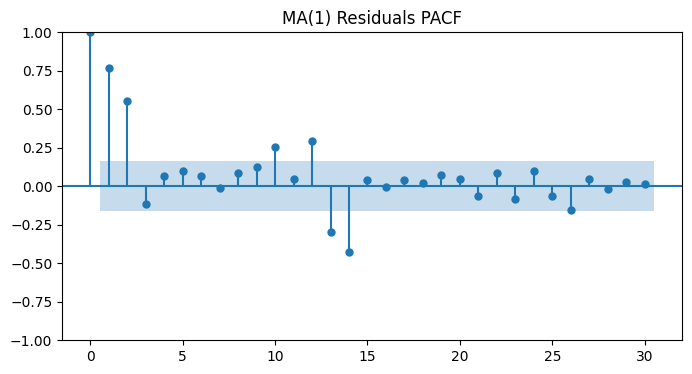

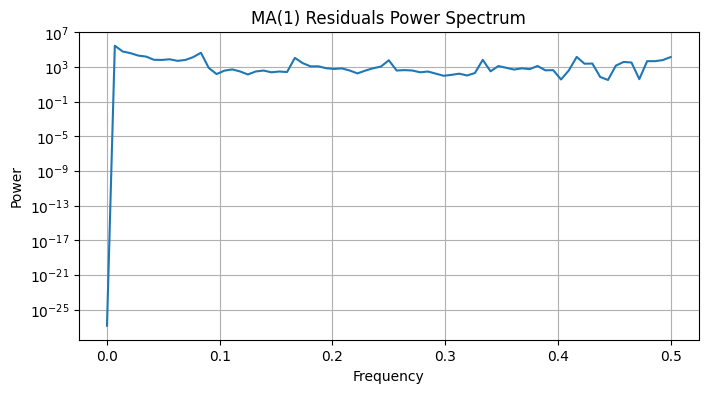

In [61]:
# MA(1) モデルの解析
analyze_residuals(ma1_resid, 'MA(1)')

## ARMA

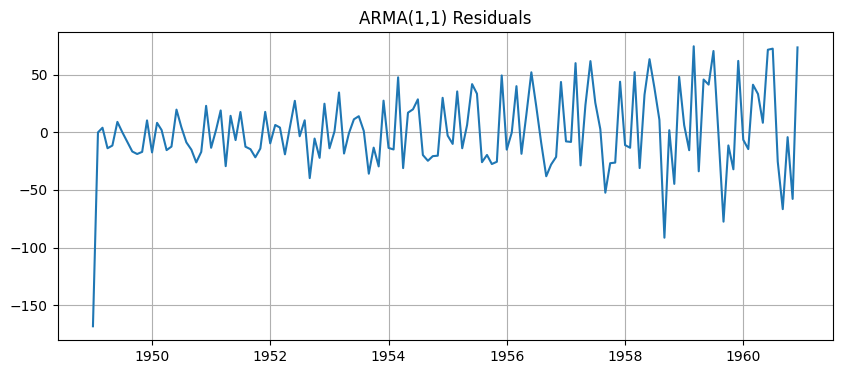

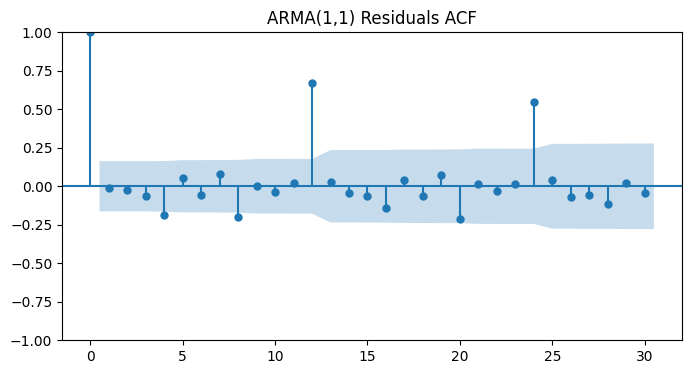

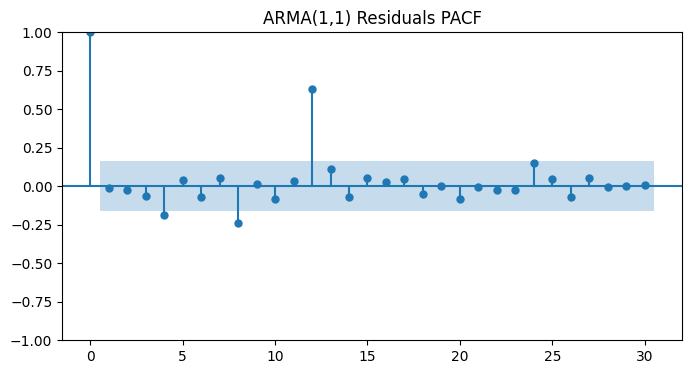

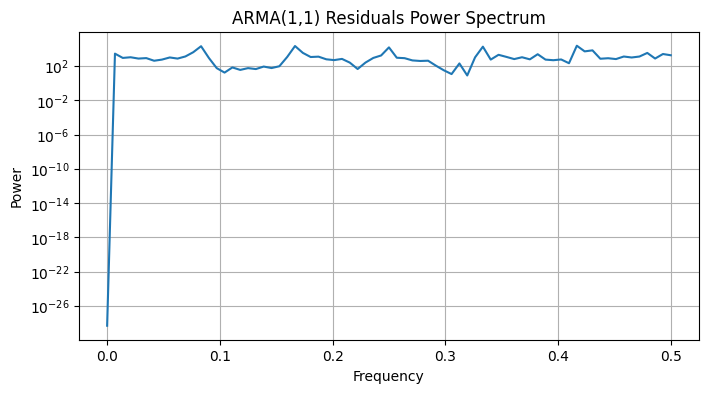

In [62]:
# ARMA(1,1) モデルの解析
analyze_residuals(arma11_resid, 'ARMA(1,1)')

# スペクトル密度関数を横軸πにして可視化

In [63]:
# 修正したスペクトル密度関数のプロット
def plot_spectrum(series, title):
    f, Pxx = periodogram(series)  # 周波数とスペクトル密度を取得
    f_pi = f * np.pi  # 周波数をπ単位に変換
    
    plt.figure(figsize=(8, 4))
    plt.plot(f_pi, Pxx)
    plt.title(title)
    plt.xlabel('Frequency (π units)')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()

In [64]:
# 残差の自己相関関数、偏自己相関関数、スペクトル密度をプロット
def analyze_residuals(resid, model_name):
    plot_residuals(resid, f'{model_name} Residuals')
    plot_acf(resid, lags=30, title=f'{model_name} Residuals ACF')
    plot_pacf(resid, lags=30, title=f'{model_name} Residuals PACF')
    plot_spectrum(resid, title=f'{model_name} Residuals Power Spectrum')

## AR

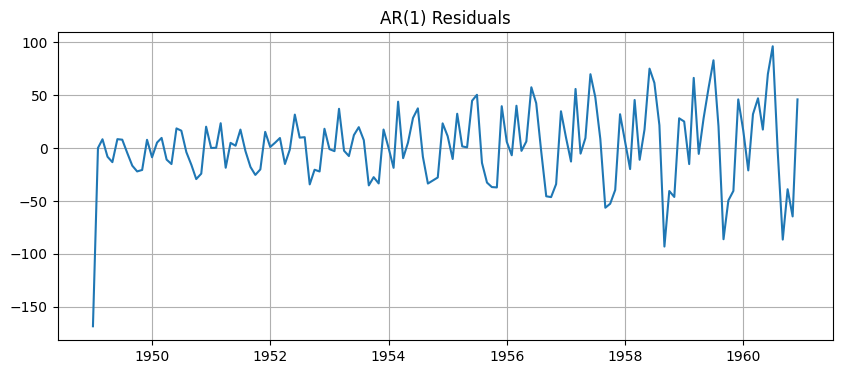

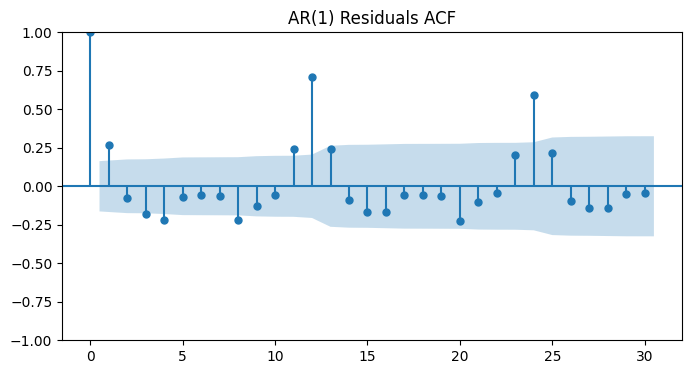

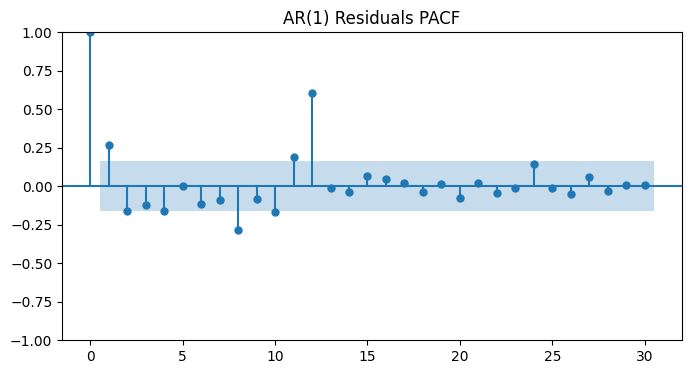

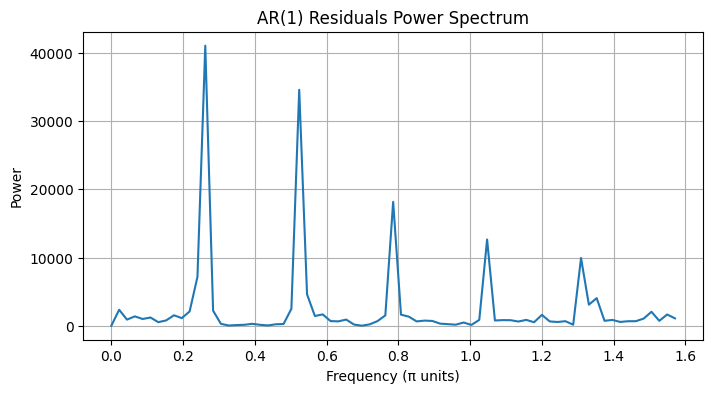

In [65]:
# AR(1) モデルの解析
analyze_residuals(ar1_resid, 'AR(1)')

## MA

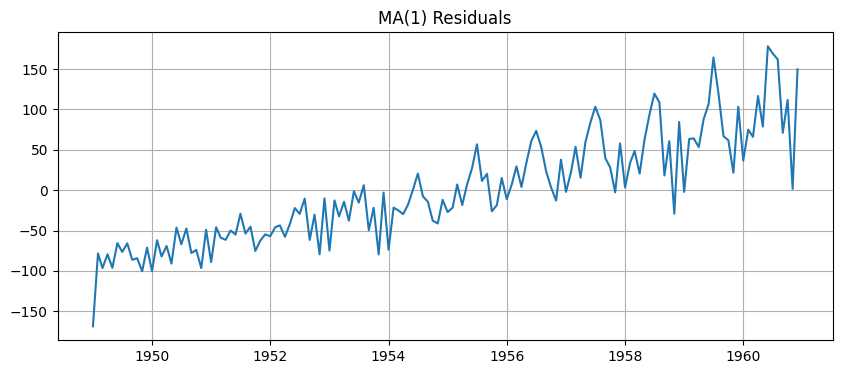

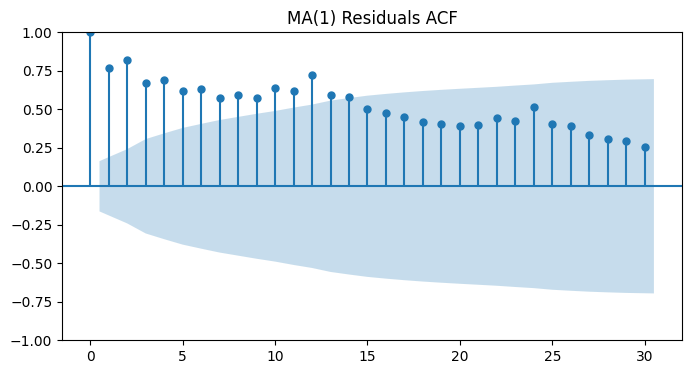

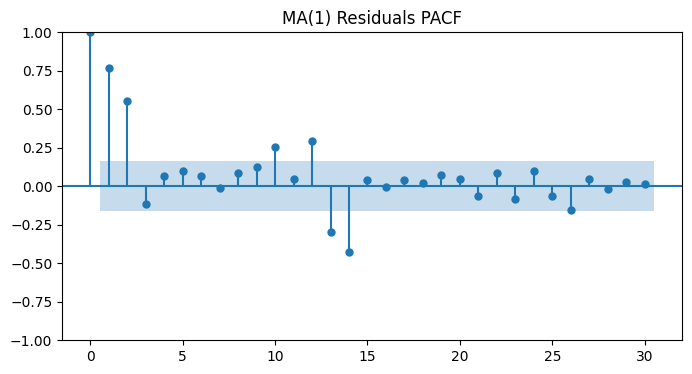

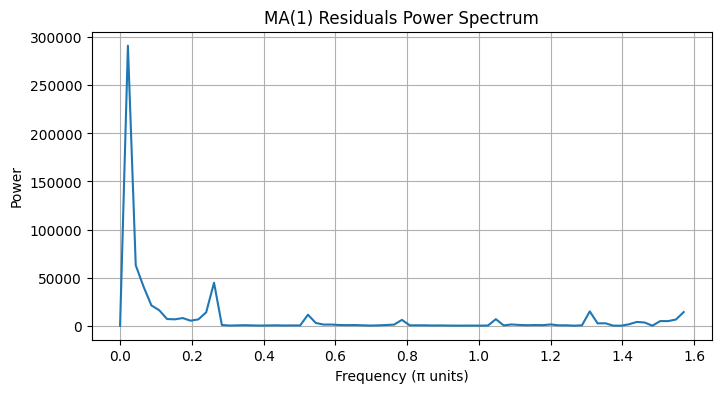

In [66]:
# MA(1) モデルの解析
analyze_residuals(ma1_resid, 'MA(1)')

## ARMA

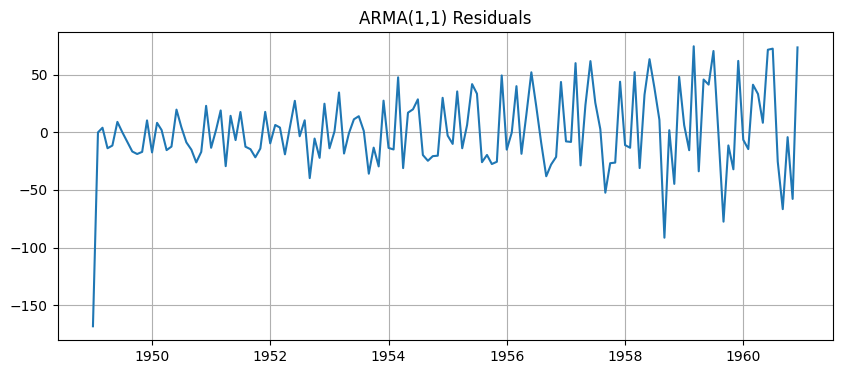

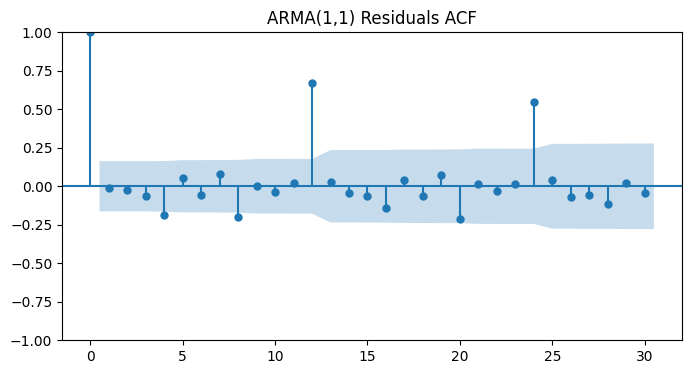

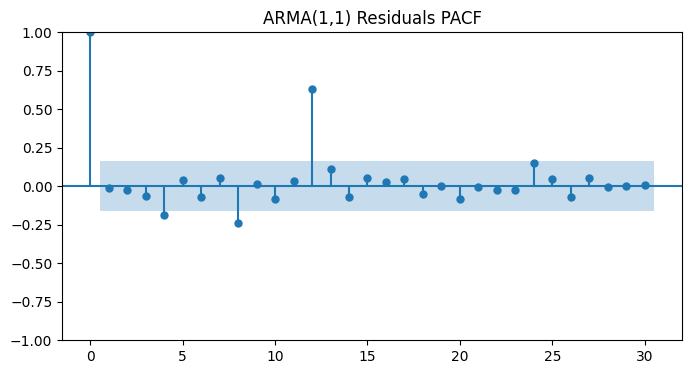

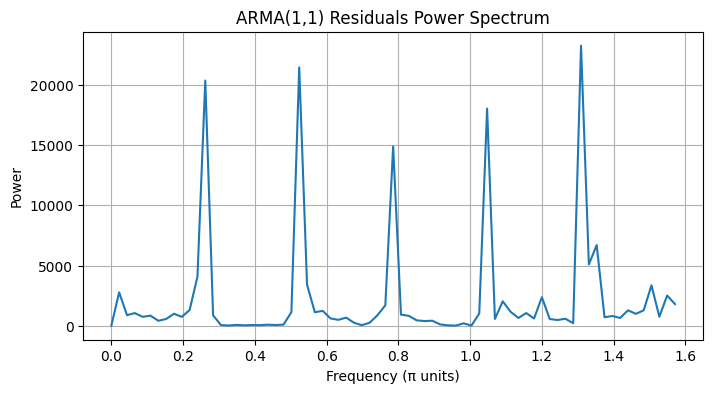

In [67]:
# ARMA(1,1) モデルの解析
analyze_residuals(arma11_resid, 'ARMA(1,1)')